The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Following the notebook of [mlennox562](https://www.kaggle.com/mlennox562/d/dalpozz/creditcardfraud/python-data-visualizations-credit-card-data)

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
columns = data.columns

features_column = columns.delete(len(columns)-1)

features = data[features_column]

labels = data['Class']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)

oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

In [8]:
len(os_labels[os_labels==1])

227454

In [9]:
clf = RandomForestClassifier(random_state=0)
clf.fit(os_features, os_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [10]:
actual = labels_test
predictions = clf.predict(features_test)

confusion_matrix(actual, predictions)

array([[56846,    15],
       [   17,    84]])

In [11]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.915709683559


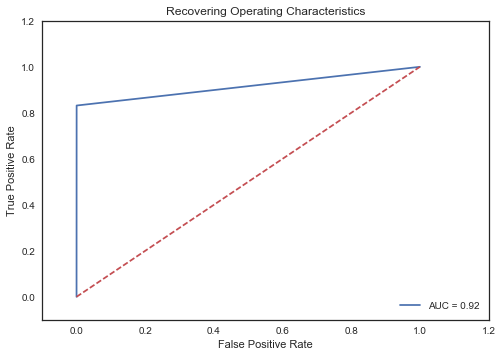

In [12]:
import matplotlib.pyplot as plt
plt.title('Recovering Operating Characteristics')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

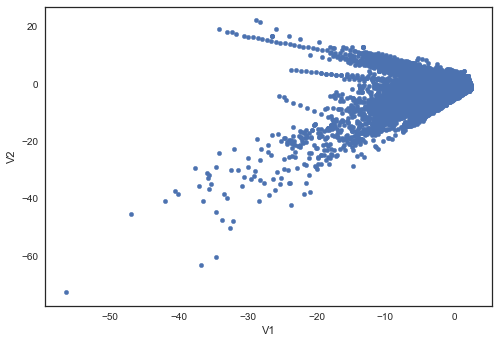

In [13]:
data.plot(kind="scatter", x="V1", y="V2")

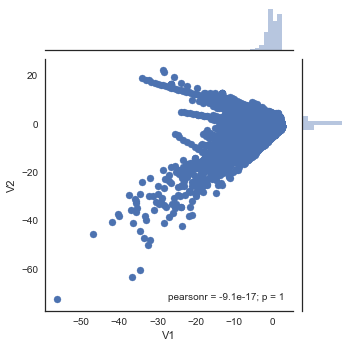

In [15]:
sns.jointplot(x="V1", y="V2", data=data, size=5)

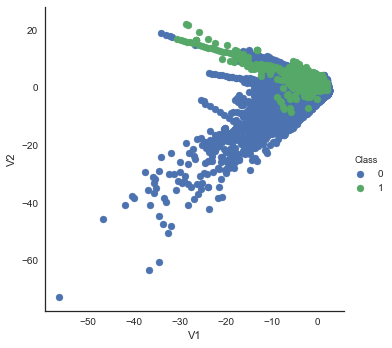

In [16]:
sns.FacetGrid(data, hue="Class", size=5) \
   .map(plt.scatter, "V1", "V2") \
   .add_legend()

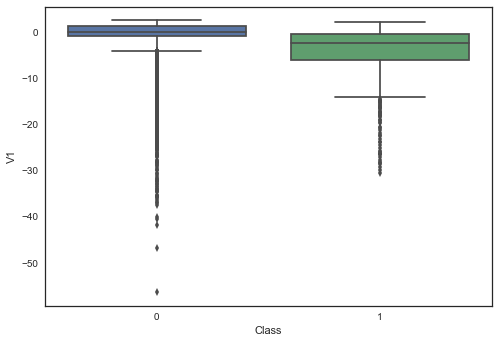

In [17]:
sns.boxplot(x="Class", y="V1", data=data)

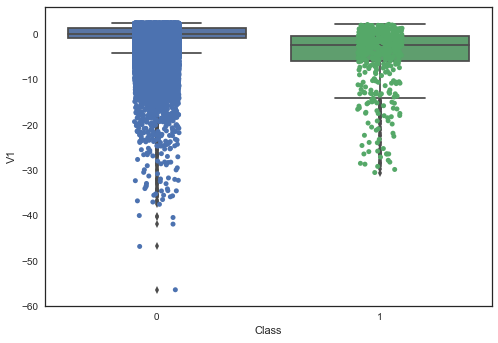

In [18]:
ax = sns.boxplot(x="Class", y="V1", data=data)
ax = sns.stripplot(x="Class", y="V1", data=data, jitter=True, edgecolor="gray")

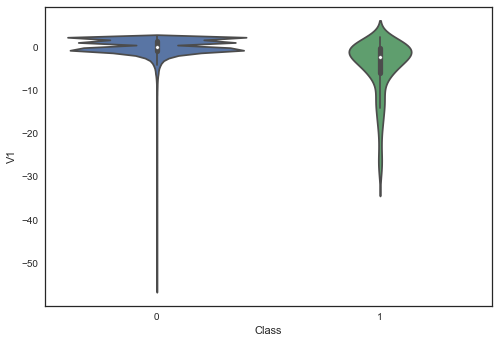

In [19]:
sns.violinplot(x="Class", y="V1", data=data, size=6)

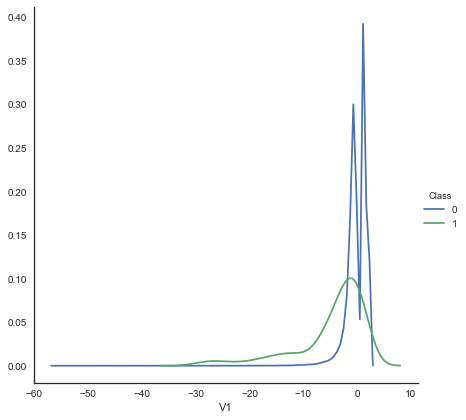

In [21]:
sns.FacetGrid(data, hue="Class", size=6) \
   .map(sns.kdeplot, "V1") \
   .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bcee812b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5bce342b00>]], dtype=object)

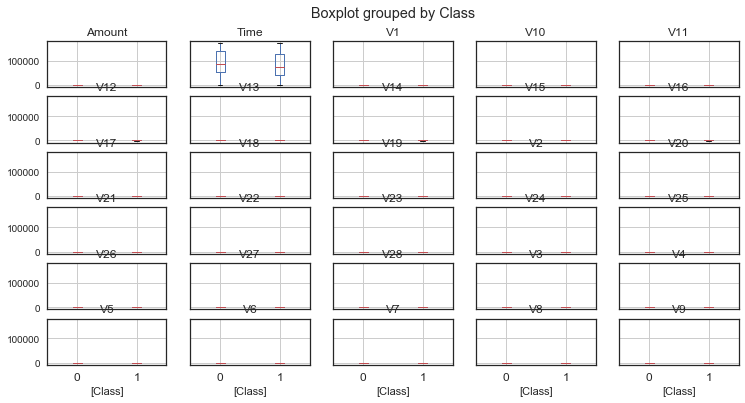

In [22]:
data.boxplot(by="Class", figsize=(12,6))

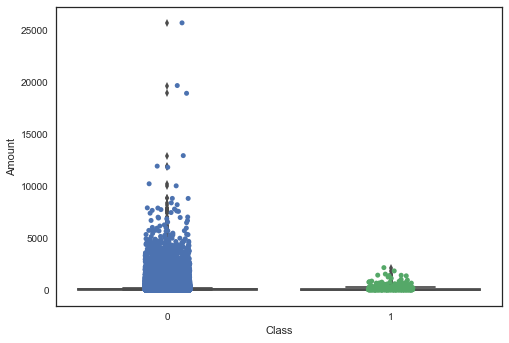

In [23]:
ax = sns.boxplot(x="Class", y="Amount", data=data)
ax = sns.stripplot(x="Class", y="Amount", data=data, jitter=True, edgecolor="gray")

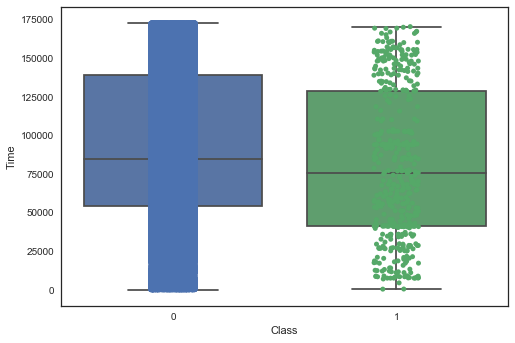

In [24]:
ax = sns.boxplot(x="Class", y="Time", data=data)
ax = sns.stripplot(x="Class", y="Time", data=data, jitter=True, edgecolor="gray")

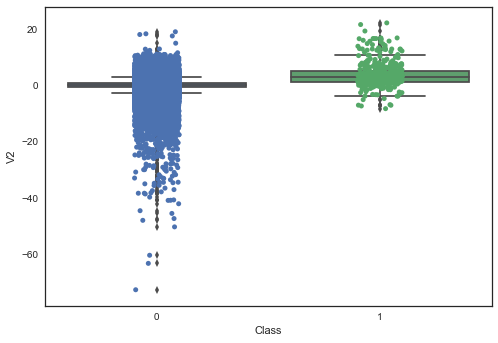

In [25]:
ax = sns.boxplot(x="Class", y="V2", data=data)
ax = sns.stripplot(x="Class", y="V2", data=data, jitter=True, edgecolor="gray")